In [72]:
import numpy as np
import pandas as pd 

In [73]:
train = pd.read_csv('../Transformed_Train.csv')
test = pd.read_csv('../Transformed_Test.csv')

In [74]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Operational_Years,Price_Per_Unit_Weight
0,Low Fat,Food,4th,3735.1380,Perishable,0.016047,OUT049,Tier 1,Medium,Supermarket Type1,20,26.861204
1,Regular,Drink,1st,443.4228,Non Perishable,0.019278,OUT018,Tier 3,Medium,Supermarket Type2,10,8.153581
2,Low Fat,Food,3rd,2097.2700,Perishable,0.016760,OUT049,Tier 1,Medium,Supermarket Type1,20,8.092457
3,Regular,Food,3rd,732.3800,Perishable,0.017834,OUT010,Tier 3,Small,Grocery Store,21,9.484115
4,No Fat,Non-Consumable,1st,994.7052,Non Perishable,0.009780,OUT013,Tier 3,High,Supermarket Type1,32,6.031512


In [75]:
train1 = pd.read_csv('../Train.csv')
test1 = pd.read_csv('../Test.csv')

In [76]:
train['Item_Id'] = train['Item_Identifier']
test['Item_Id'] = test['Item_Identifier']

In [77]:
train['Item_Identifier'] = train1['Item_Identifier']
test['Item_Identifier'] = test1['Item_Identifier']
train['Outlet'] = train['Outlet_Identifier']
test['Outlet'] = test['Outlet_Identifier']

In [78]:
train.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Operational_Years,Price_Per_Unit_Weight,Item_Id,Outlet
0,Low Fat,FDA15,4th,3735.1380,Perishable,0.016047,OUT049,Tier 1,Medium,Supermarket Type1,20,26.861204,Food,OUT049
1,Regular,DRC01,1st,443.4228,Non Perishable,0.019278,OUT018,Tier 3,Medium,Supermarket Type2,10,8.153581,Drink,OUT018


In [79]:
test.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Operational_Years,Price_Per_Unit_Weight,Item_Id,Outlet
0,Low Fat,FDW58,2nd,Unknown,0.007565,OUT049,Tier 1,Medium,Supermarket Type1,20,5.198178,Food,OUT049
1,Regular,FDW14,2nd,Perishable,0.038428,OUT017,Tier 2,Small,Supermarket Type1,12,10.520458,Food,OUT017


<h4> Encoding categorical variables. (One Hot Encoding) </h4>

In [80]:
categorical_variables = ['Item_Fat_Content', 'Item_MRP', 'Item_Type', 'Outlet_Location_Type', 
                         'Outlet_Size', 'Outlet_Type', 'Item_Id', 'Outlet']

In [81]:
train = pd.get_dummies(train, columns = categorical_variables, drop_first = True)
test = pd.get_dummies(test, columns = categorical_variables, drop_first = True)

In [82]:
train.head(2)

,Item_Identifier,Item_Outlet_Sales,Item_Visibility,Outlet_Identifier,Operational_Years,Price_Per_Unit_Weight,Item_Fat_Content_No Fat,Item_Fat_Content_Regular,Item_MRP_2nd,Item_MRP_3rd,...,Item_Id_Non-Consumable,Outlet_OUT013,Outlet_OUT017,Outlet_OUT018,Outlet_OUT019,Outlet_OUT027,Outlet_OUT035,Outlet_OUT045,Outlet_OUT046,Outlet_OUT049
0,FDA15,3735.1380,0.016047,OUT049,20,26.861204,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,443.4228,0.019278,OUT018,10,8.153581,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [83]:
c = train.corr()

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


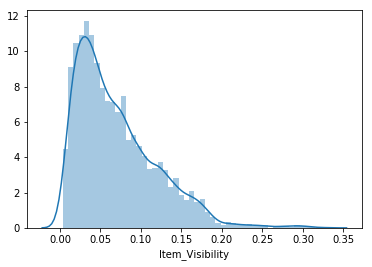

In [86]:
sns.distplot(train['Item_Visibility'])

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


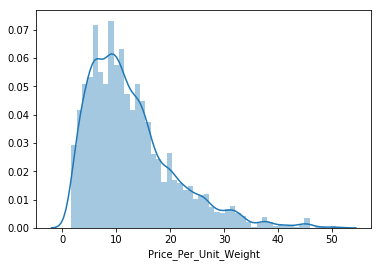

In [87]:
sns.distplot(train['Price_Per_Unit_Weight'])

We can see that Item_Visibility and Price_Per_Unit_Weight has positively skewed distribution. So, we will use log transform to make them approximately normal.

In [88]:
train['Item_Visibility'] = np.log(train['Item_Visibility'])
train['Price_Per_Unit_Weight'] = np.log(train['Price_Per_Unit_Weight'])

test['Item_Visibility'] = np.log(test['Item_Visibility'])
test['Price_Per_Unit_Weight'] = np.log(test['Price_Per_Unit_Weight'])

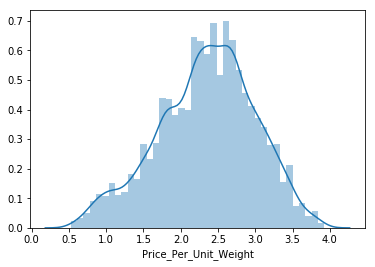

In [92]:
sns.distplot(train['Price_Per_Unit_Weight'])

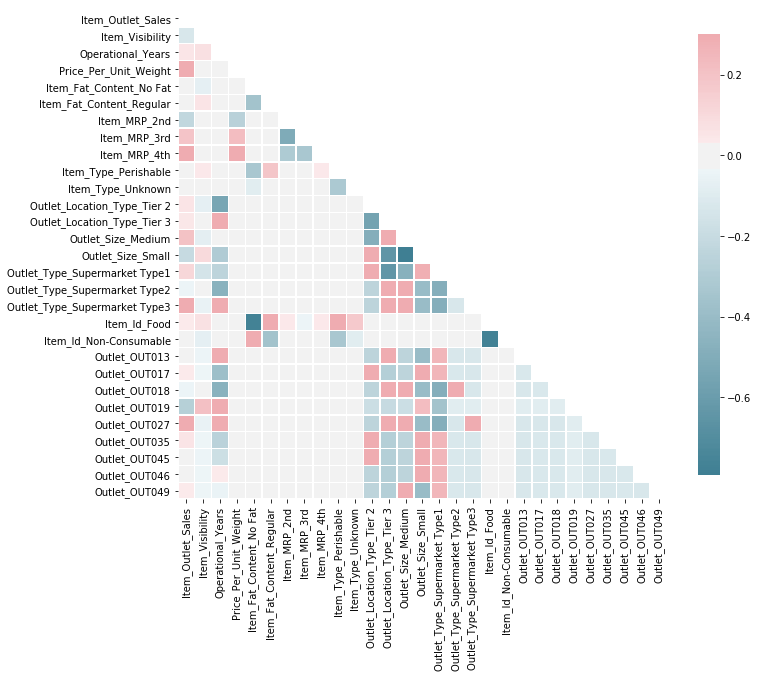

In [93]:
# Plotting correlation matrix for train dataframe

# Generate a mask for the upper triangle
mask = np.zeros_like(c, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(c, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})

In [94]:
# Removing Item_Identifier and Outlet_Identifier
train.drop(labels=['Item_Identifier', 'Outlet_Identifier'], inplace=True, axis=1)

In [98]:
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values
X_test = test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1).iloc[: , :]

<h4> Multiple Linear Regression </h4>

In [109]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import SCORERS

In [116]:
lr = LinearRegression(normalize=True)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [117]:
mean_sq_error = cross_val_score(lr,X,y=y, cv=X.shape[1], scoring='neg_mean_squared_error').mean()
std = cross_val_score(lr,X,y=y, cv=X.shape[1], scoring='neg_mean_squared_error').std()
print(np.abs(mean_sq_error) ** 0.5)
print(np.abs(std) ** 0.5)

1153.3574825058959
357.4887634582804


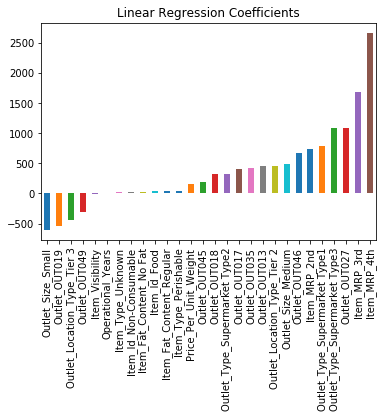

In [127]:
predictors = [x for x in train.columns if x != 'Item_Outlet_Sales']
coefficients = pd.Series(lr.coef_, predictors).sort_values()
coefficients.plot(kind='bar', title = 'Linear Regression Coefficients')

In [128]:
# Lets make predictions
y_pred = lr.predict(X_test)

In [129]:
submission1 = test[['Item_Identifier', 'Outlet_Identifier']]

In [131]:
submission1['Item_Outlet_Sales'] = pd.Series(y_pred)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
submission1.to_csv('../Submission1.csv', index=False)

<h4> Ridge </h4>

In [134]:
from sklearn.linear_model import Ridge

In [146]:
ridge = Ridge()

In [152]:
parameters = {'alpha':[0.00001, 0.001, 0.01, 0.05, 1, 5, 10, 20]}
best_ridge = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv = X.shape[1])
best_ridge.fit(X, y)

GridSearchCV(cv=28, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.001, 0.01, 0.05, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [153]:
print(best_ridge.best_params_)
print(np.abs(best_ridge.best_score_)**0.5)

{'alpha': 0.05}
1153.3523116921776


In [154]:
ridge = Ridge(alpha=0.05)
ridge.fit(X, y)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [155]:
# Making Predictions
y_pred = ridge.predict(X_test)

In [156]:
submission1 = test[['Item_Identifier', 'Outlet_Identifier']]
submission1['Item_Outlet_Sales'] = pd.Series(y_pred)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [157]:
submission1.to_csv('../Submission2.csv', index=False)

<h4> Lasso </h4>

In [169]:
from sklearn.linear_model import Lasso

In [170]:
lasso = Lasso()

In [171]:
parameters = {'alpha':[x for x in np.arange(0.0001, 0.01, 0.0002)]}
best_lasso = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv = X.shape[1], n_jobs=-1)
best_lasso.fit(X, y)

GridSearchCV(cv=28, error_score='raise-deprecating',
       estimator=Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.00030000000000000003, 0.0005000000000000001, 0.0007000000000000001, 0.0009000000000000002, 0.0011000000000000003, 0.0013000000000000002, 0.0015000000000000002, 0.0017000000000000003, 0.0019000000000000004, 0.0021000000000000003, 0.0023000000000000004, 0.0025, 0.0027, ...00000001, 0.008900000000000002, 0.0091, 0.009300000000000001, 0.009500000000000001, 0.0097, 0.0099]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [172]:
print(best_lasso.best_params_)
print(np.abs(best_lasso.best_score_)**0.5)

{'alpha': 0.0099}
1153.3524259986937


<h4> Random Forest </h4>

In [173]:
from sklearn.ensemble import RandomForestRegressor

In [182]:
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [184]:
# Hyperparameter tuning for RandomForest
parameters = [{'n_estimators':[10,20,30,40,50], 'max_depth':[10,20,30,50,100,None], 
               'max_features':['auto','sqrt','log2',None]}]
grid = GridSearchCV(rfr, parameters, scoring='neg_mean_squared_error', cv=X.shape[1], n_jobs=-1)
grid.fit(X,y)
print("Best: %f using %s" % (np.abs(grid.best_score_)**0.5, grid.best_params_))

Best: 1124.189817 using {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 30}


In [185]:
rfr_tuned = RandomForestRegressor(n_estimators=30, max_depth=10, max_features='sqrt')
rfr_tuned.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [186]:
mean_sq_error = cross_val_score(rfr_tuned ,X,y=y, cv=X.shape[1], scoring='neg_mean_squared_error').mean()
std = cross_val_score(rfr_tuned ,X,y=y, cv=X.shape[1], scoring='neg_mean_squared_error').std()
print(np.abs(mean_sq_error) ** 0.5)
print(np.abs(std) ** 0.5)

1125.1763039452173
349.3106998535757


In [187]:
# Making Predictions
y_pred = rfr_tuned.predict(X_test)

In [188]:
submission1 = test[['Item_Identifier', 'Outlet_Identifier']]
submission1['Item_Outlet_Sales'] = pd.Series(y_pred)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [189]:
submission1.to_csv('../Submission4.csv', index=False)